In [5]:
import pandas as pd
import seaborn as sns
results = pd.read_csv('results.csv', index_col=None)
for name in ['_no_block', '_cbh', '_degree']:
    results['total' + name] = sum(results[str(i)+name] for i in range(1, 4)).subtract(20) 
results.head()
sns.set()
results = results[results.seed_size == 20]
print(results.columns)
results.head()

Index(['network_name', 'threshold', 'seed_size', 'budget_total', '0_no_block',
       '1_no_block', '2_no_block', '3_no_block', '0_cbh', '1_cbh', '2_cbh',
       '3_cbh', '0_degree', '1_degree', '2_degree', '3_degree',
       'total_no_block', 'total_cbh', 'total_degree'],
      dtype='object')


,network_name,threshold,seed_size,budget_total,0_no_block,1_no_block,2_no_block,3_no_block,0_cbh,1_cbh,2_cbh,3_cbh,0_degree,1_degree,2_degree,3_degree,total_no_block,total_cbh,total_degree
33,netscience,2,20,14,1440.0,0.0,0.0,21.0,1440.3,4.1,2.1,14.5,1440.0,0.8,1.0,19.2,1.0,0.7,1.0
34,netscience,2,20,29,1440.0,0.0,0.0,21.0,1440.7,4.5,5.3,10.5,1440.0,3.0,2.6,15.4,1.0,0.3,1.0
35,netscience,2,20,43,1440.0,0.0,0.0,21.0,1440.7,4.5,5.3,10.5,1440.0,5.0,5.1,10.9,1.0,0.3,1.0
36,netscience,2,20,58,1440.0,0.0,0.0,21.0,1440.7,4.5,5.3,10.5,1440.0,6.6,7.5,6.9,1.0,0.3,1.0
37,netscience,2,20,73,1440.0,0.0,0.0,21.0,1440.7,4.5,5.3,10.5,1440.0,6.6,7.5,6.9,1.0,0.3,1.0


ZeroDivisionError: division by zero

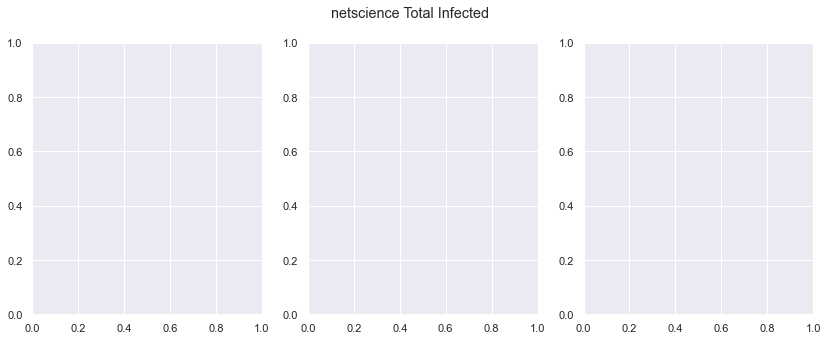

In [14]:
import matplotlib.pyplot as plt
import numpy as np
names = ['netscience', 'astroph', 'wiki']
thres = [2, 3, 5]

for name in names:
    threshold = results[results.network_name == name]
    fig, ax = plt.subplots(1,3, figsize=(14, 5))
    fig.suptitle(name + " Total Infected")
#        threshold = threshold[threshold.seed_size == 10]
    my_range = np.arange(0, int(threshold.total_no_block.max()), int(threshold.total_no_block.max()) // 5)
    for i in range(len(thres)):
        subdf = threshold[threshold.threshold == thres[i]]
        cbh, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_cbh)[:-1])
        degree, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_degree)[:-1])
        no_block, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_no_block)[:-1])
        ax[i].set_xticks(list(subdf.budget_total)[:-1])
#         ax[i].set_yticks(my_range)
    fig.tight_layout(pad=1)
    fig.legend([cbh, degree, no_block], ['CBH Count', "Degree Count", "No Blocking Count"])
    for i in range(3):
        ax[i].set_xlabel("Blocking Budget: Threshold " + str(thres[i]))
    ax[0].set_ylabel("Case Count")
    plt.savefig("infected_cnt_" + name + ".pdf")

In [9]:
astroph = results[(results.network_name == "astroph")]

astro_sub_df = astroph[['total_no_block', 'threshold', 'total_degree', 'total_cbh', 'budget_total' ]]
astro_sub_df

,total_no_block,threshold,total_degree,total_cbh,budget_total
36,15812,2,15812,20,375
37,13872,3,13872,20,375
38,20,5,20,20,375
39,15812,2,15812,20,750
40,13872,3,13872,20,750
41,20,5,20,20,750
42,15812,2,15812,20,1126
43,13872,3,13872,20,1126
44,20,5,20,20,1126
45,15812,2,15812,20,1877
